In [337]:
import numpy as np
import scipy
from collections import defaultdict
import matplotlib.pyplot as plt

In [257]:
class Variable:
    def __init__(self, val, local_g=[]):
        self.val = val
        self.local_g = local_g
    def __add__(self, other):
        return add(self, other)
    
    def __mul__(self, other):
        return mul(self, other)
    
    def __sub__(self, other):
        return add(self, neg(other))

    def __truediv__(self, other):
        return mul(self, inv(other)) 
def add(a, b):
    val = a.val + b.val
    grad = ((a, 1), (b, 1))
    return Variable(val, grad)
def neg(a):
    val = -1 * a.val
    grad = ((a, -1),)
    return Variable(val, grad)
def mul(a, b):
    val = a.val * b.val
    grad = ((a, b.val), (b, a.val))
    return Variable(val, grad)
def inv(a):
    val = 1 / a.val
    grad = ((a, -1/(a.val**2)),)
    return Variable(val, grad)
def exp(a):
    val = np.exp(a.val)
    grad = ((a, a.val),)
    return Variable(val, grad)
def log(a):
    val = np.log(a.val)
    grad = ((a, 1/a.val),)
    return Variable(val, grad)
def square(a):
    val = a.val * a.val
    grad = ((a, 2 * a.val),)
    return Variable(val, grad) 

In [271]:
def f(a, b):
    return add(square(mul(a, b)), neg(inv(exp(add(a, b)))))
def F(a, b):
    return (a * b)**2 - 1/(np.exp(a+ b))

In [325]:
def get_G(variable):
    G = defaultdict(lambda: 0)
    def compute_G(variable, p_val):
        for c, locG in variable.local_g:
            p_to_c = locG * p_val
            G[c] = G[c] + p_to_c # G with respect child, just step step step
            compute_G(c, p_to_c)
    compute_G(variable, p_val = 1) # dF/dF , call compute_G
    return G

In [326]:
a = Variable(13)
b = Variable(3)
V = f(a, b)
v = F(13, 3)

In [327]:
gradient = get_G(V)
D = (gradient[a], gradient[b])
value = (a.val, b.val)

In [328]:
vals = np.vectorize(lambda x : Variable(x)) #array to Variable object

In [329]:
toval = np.vectorize(lambda var : var.val)

In [330]:
x = vals(np.random.rand(100))

In [331]:
np.random.seed(55555)
W = vals(np.random.rand(100))
x = vals(np.random.rand(50))
y = vals(np.random.randint(0,2,(50)))

In [332]:
x = vals(np.random.random(100))
y_true = vals(np.random.randint(0,2, 50))
weights = vals(np.random.rand(100, 50))

In [383]:
g = []
def update_weights(weights, gradients, lrate):
    for _, weight in np.ndenumerate(weights):
        g.append(gradients[weight])
        weight.val -= lrate * gradients[weight]

In [384]:
loss_vals = []
lrate = 0.001
for i in range(100):
    y_pred = np.dot(x, weights)
    loss = np.sum((y_true - y_pred) * (y_true - y_pred))
    loss_vals.append(loss.val)
    gradients = get_G(loss)
    update_weights(weights, gradients, lrate)

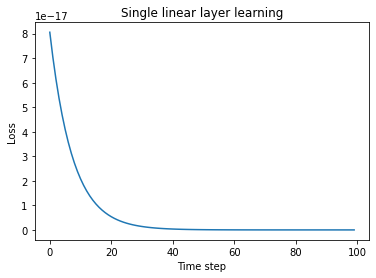

In [385]:
plt.plot(loss_vals)
plt.xlabel("Time step")
plt.ylabel("Loss")
plt.title("Single linear layer learning")
plt.show()

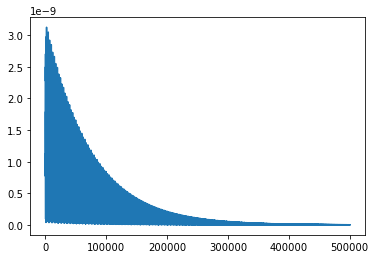

In [386]:
plt.plot(g)